# GAN MNIST 

## 데이터 불러오기 

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [44]:
mnist = datasets.mnist
(x_train_ori, _), (_, _) = mnist.load_data()

In [45]:
x_train_ori.shape

(60000, 28, 28)

In [48]:
#이 처리를 처리면 채널만 추가됨 (28, 28, 1)
x_train = x_train_ori.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train = x_train/127.5 - 1

In [49]:
x_train[0].shape

(28, 28, 1)

In [50]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)

# CNN MNIST - 레이어 확인해보기 

## Convolution 

In [181]:
mnist = datasets.mnist
(x_train_ori, y_train), (x_test_ori, y_test) = mnist.load_data()

In [182]:
#이미지 확인
image = x_train_ori[0]
print(image.shape)

(28, 28)


In [183]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [184]:
#형변환 꼭!
image = tf.cast(image,dtype=tf.float32)

In [185]:
layer = keras.layers.Conv2D(3, (3,3), 1, padding='SAME')

In [186]:
#필터 수 만큼 채널 수가 바뀌게 됨 그래서 1에서 3으로 바뀜 
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

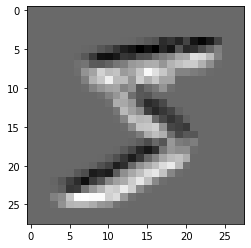

In [187]:
plt.imshow(output[0,:,:,0] ,'gray')

In [188]:
#이미지의 최소값이0에서 최대값 255까지 
np.min(image), np.max(image)

(0.0, 255.0)

In [189]:
#convolution을 거치면서 이렇게 변함 
np.min(output), np.max(output)

(-127.23568, 205.84602)

In [190]:
weight = layer.get_weights()
weight

[array([[[[ 0.04387671, -0.3437371 , -0.15895204]],
 
         [[ 0.30555505,  0.35091168,  0.11639732]],
 
         [[ 0.0240894 , -0.06301537,  0.22188926]]],
 
 
        [[[ 0.38379753,  0.20470935, -0.10717484]],
 
         [[-0.20587246,  0.0995205 ,  0.27901858]],
 
         [[ 0.18911535, -0.09614807,  0.33081716]]],
 
 
        [[[-0.36689237, -0.06637555, -0.12513149]],
 
         [[-0.05724785,  0.28587562,  0.38046157]],
 
         [[-0.10488117, -0.1216417 , -0.36115268]]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [191]:
weight[0].shape ,weight[1].shape

((3, 3, 1, 3), (3,))

## 히스토그램으로 값 확인 

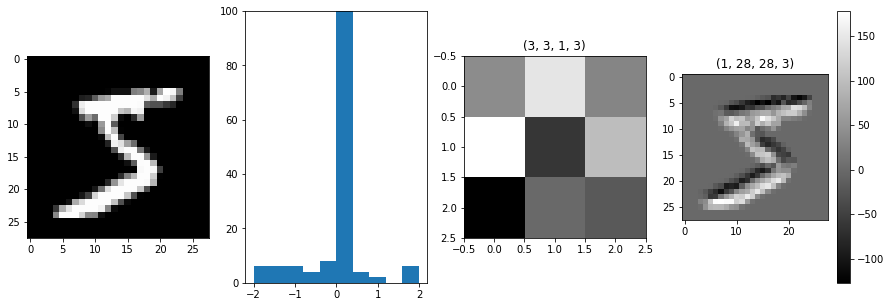

In [192]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(image[0,:,:,0], 'gray') #원본 이미지
plt.subplot(142) 
plt.hist(output.numpy().ravel(), range=[-2,2]) #아웃풋 히스토그램
plt.ylim(0,100)
plt.subplot(143)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray') #가중치 필터
plt.subplot(144)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray') #output 이미지
plt.colorbar()
plt.show()

## Activation Function 

In [193]:
act_layer = keras.layers.ReLU()
act_output = act_layer(output)

In [194]:
act_output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [195]:
np.min(act_output), np.max(act_output)

(0.0, 205.84602)

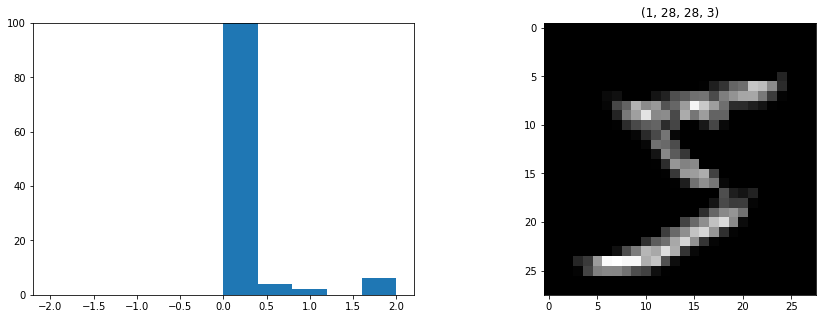

In [196]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

## Pooling

In [197]:
keras.layers.MaxPool2D(pool_size = (2,2), strides=(2,2), padding='SAME')

In [198]:
pool_layer = keras.layers.MaxPool2D(pool_size = (2,2), strides=(2,2), padding='SAME')

In [199]:
pool_output = pool_layer(act_output)

In [200]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [201]:
pool_output.shape

TensorShape([1, 14, 14, 3])

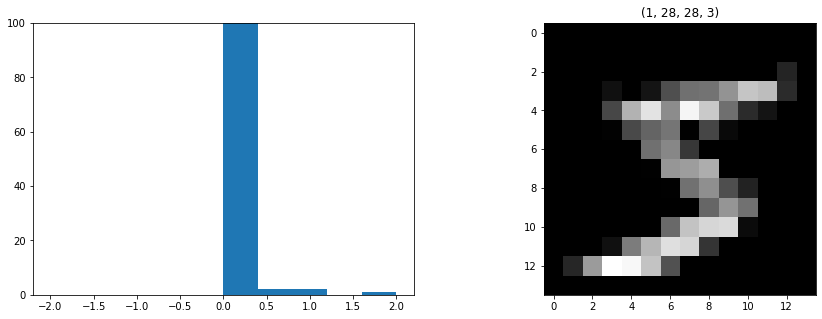

In [202]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.show()

## Classification 

### Flatten 

In [203]:
layer = keras.layers.Flatten()
flatten = layer(output)

In [204]:
output.shape

TensorShape([1, 28, 28, 3])

In [205]:
flatten.shape

TensorShape([1, 2352])

In [206]:
28*28*3

2352

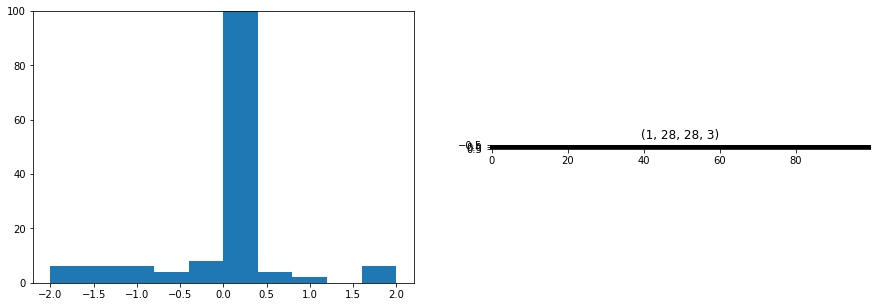

In [207]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(flatten.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(flatten[:,:100], 'gray')
plt.show()

### Dense 

In [208]:
layer = keras.layers.Dense(32, activation='relu')
output = layer(flatten)

In [209]:
output.shape

TensorShape([1, 32])

### Dropout 

In [210]:
layer = keras.layers.Dropout(0.7)
output=layer(output)

In [211]:
output.shape

TensorShape([1, 32])

## Model 생성


In [249]:

model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32,(3,3),padding='SAME', activation='relu'),
    keras.layers.Conv2D(32,(3,3),padding='SAME', activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),padding='SAME', activation='relu'),
    keras.layers.Conv2D(64,(3,3),padding='SAME', activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

## Loss Function

In [213]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

In [214]:
loss_fun = keras.losses.sparse_categorical_crossentropy

## Metrics
모델을 평가하는 방법

In [215]:
metrics=['accuracy']
keras.metrics.Accuracy()
metrics = [keras.metrics.Accuracy()]


#평가 방법은 3가지가 있음 
keras.metrics.Accuracy()
keras.metrics.Precision()
keras.metrics.Recall()

In [250]:
#컴파일
model.compile(loss = loss_fun, optimizer='Adam', metrics=[keras.metrics.Accuracy()])

In [262]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [263]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [264]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [265]:
#채널 늘리기 - 차원수 늘리기 방법 1
x_train_2= np.expand_dims(x_train_ori, -1).shape
print(x_train_2)

(60000, 28, 28, 1)


In [266]:
#채널 늘리기 - 차원수 늘리기 방법 2
x_train_3 = tf.expand_dims(x_train_ori, -1).shape
print(x_train_3)

(60000, 28, 28, 1)


In [267]:
#채널 늘리기 - 차원수 늘리기 방법 3
x_train_4 = x_train[...,tf.newaxis].shape
print(x_train_4)

(60000, 28, 28, 1)


In [268]:
x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]

In [269]:
x_train.shape

(60000, 28, 28, 1)

In [270]:
#Rescaling 현재는 0, 255 => Rescaling을 해서 학습이 용이하도록 하기
np.min(x_train), np.max(x_train)

(0, 255)

In [271]:
x_train = x_train/255.0
x_test = x_test /255.0

In [272]:
np.min(x_train), np.max(x_train) # 0과 1사이로 변함 

(0.0, 1.0)

## Training  

In [275]:
model.fit(x_train, y_train, epochs=20, batch_size =32, shuffle=True )

Epoch 1/20


TypeError: 'NoneType' object is not callable